# Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [4]:
data = pd.read_csv('data_for_lr.csv')

In [6]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Data Preprocessing 

##### Handling NULL Value

In [39]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitting data

In [14]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# Linear Regression

## Forward Propogation

##### f(x) = m*x + c ; where m and c are the parameters that or model will learn through training.

In [16]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Defining Cost Function
### Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5

#### where y are the actual or true values and f(x) are the predicted values.

In [18]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# Gradient Descent for Backpropagation

In [20]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Update the Parameters

In [22]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Train the Data

In [24]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training 

Iteration = 1, Loss = 2248.266570516223


<Figure size 640x480 with 0 Axes>

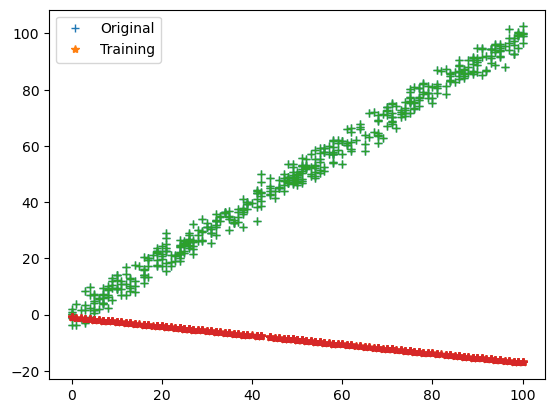

Iteration = 2, Loss = 1022.214887164741


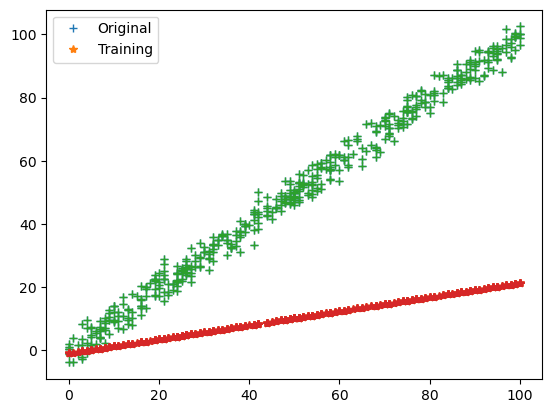

Iteration = 3, Loss = 465.9538785073337


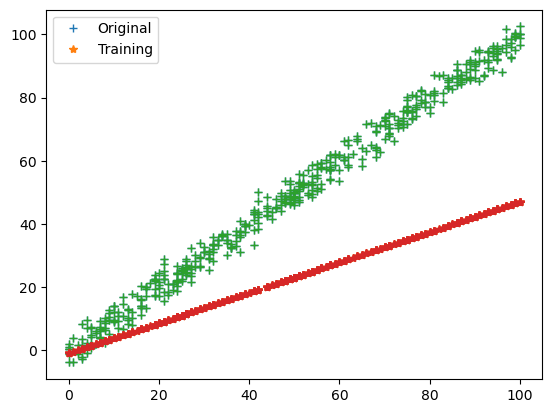

Iteration = 4, Loss = 213.57764084648008


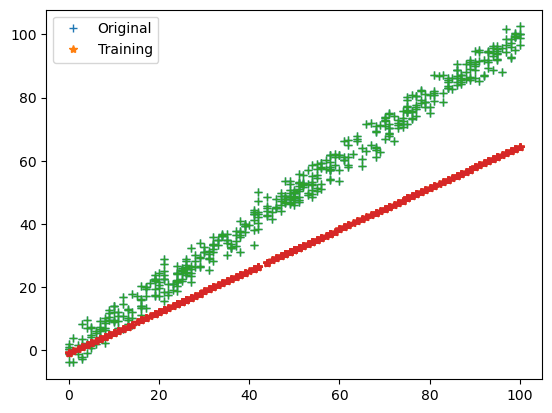

Iteration = 5, Loss = 99.07426038215493


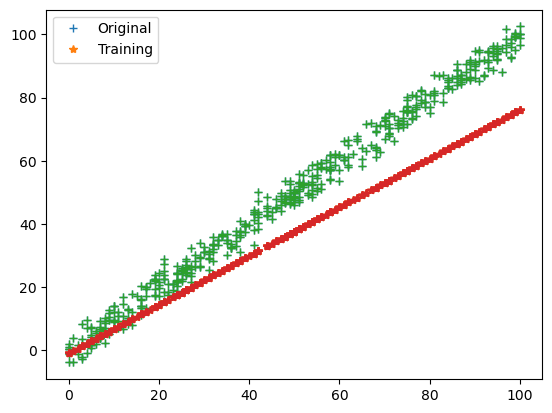

Iteration = 6, Loss = 47.1239479416492


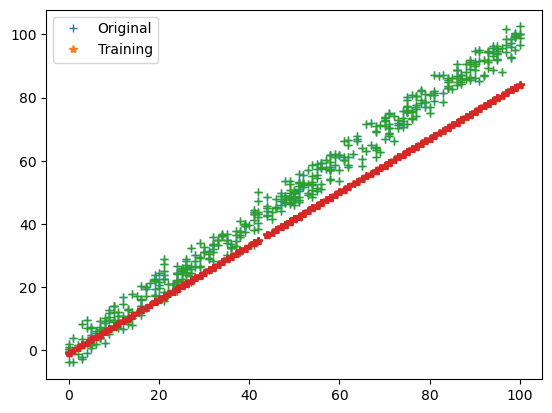

Iteration = 7, Loss = 23.554031750001947


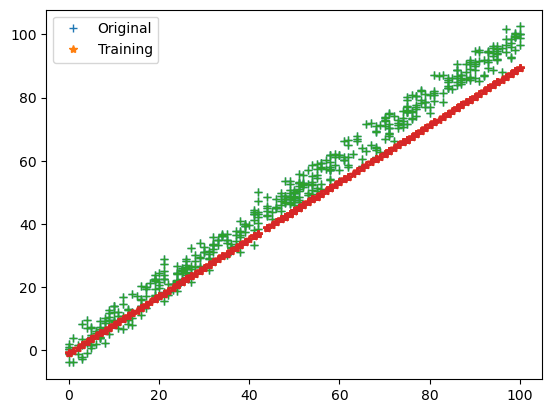

Iteration = 8, Loss = 12.860332771853852


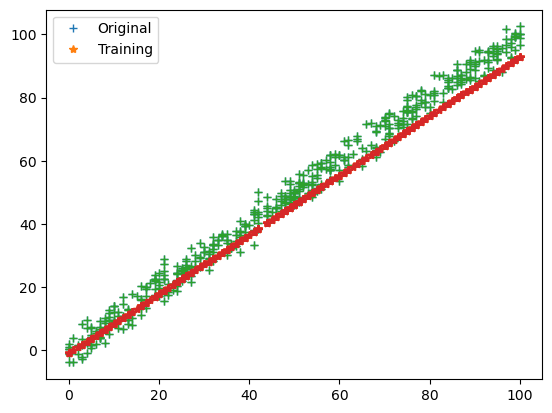

Iteration = 9, Loss = 8.008587805794653


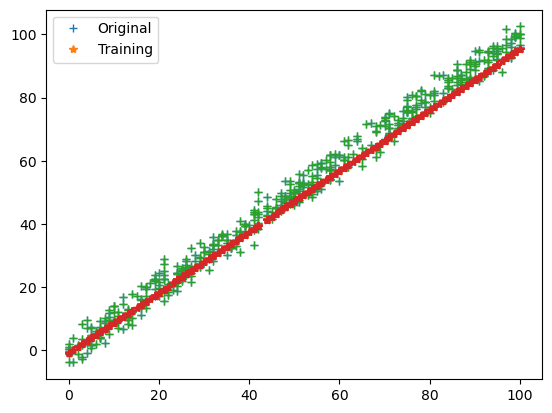

Iteration = 10, Loss = 5.807343845904665


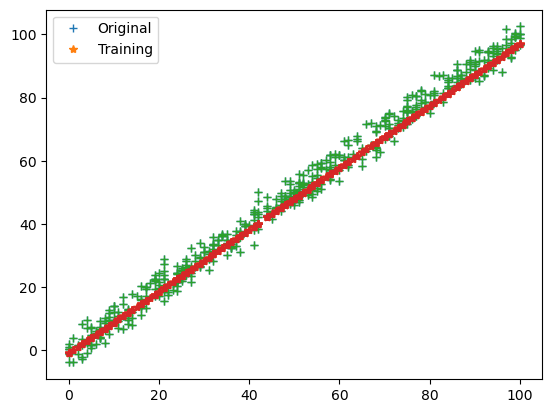

Iteration = 11, Loss = 4.808635128413234


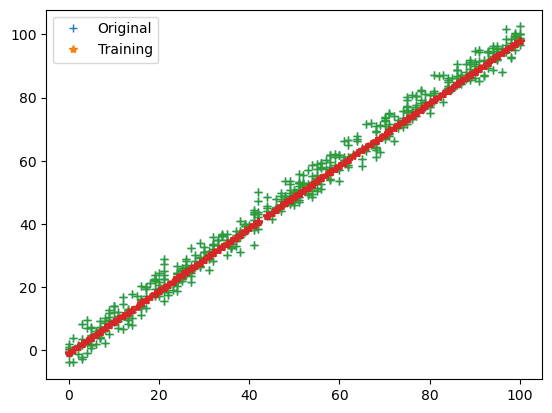

Iteration = 12, Loss = 4.3555179824710795


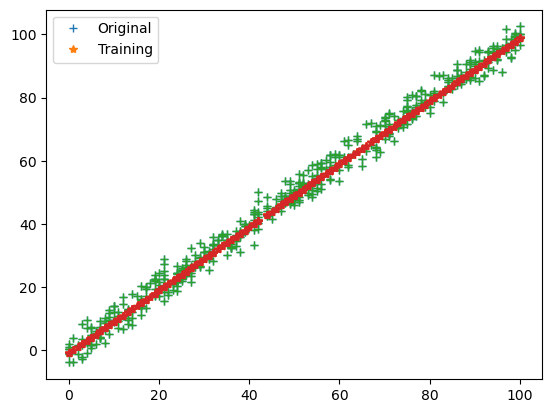

Iteration = 13, Loss = 4.149936336955982


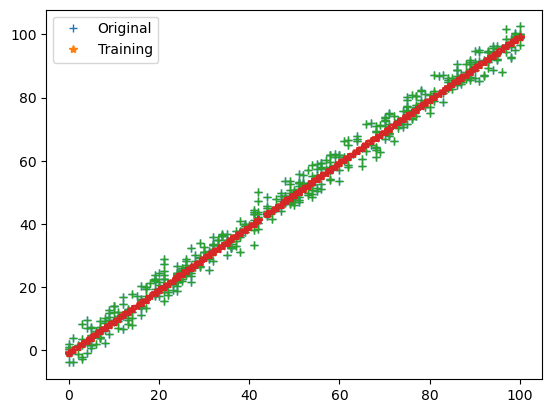

Iteration = 14, Loss = 4.056661822260598


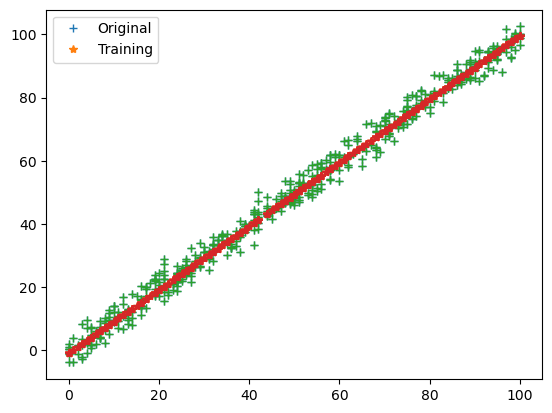

Iteration = 15, Loss = 4.014341177309544


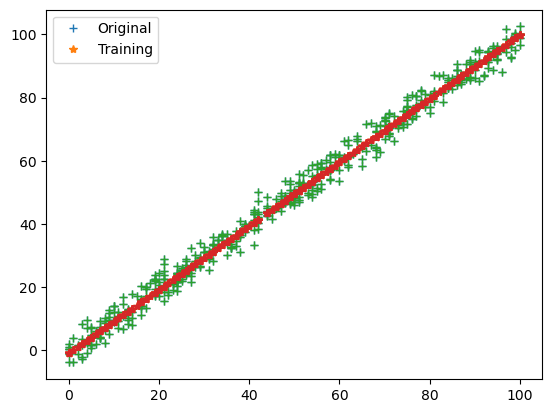

Iteration = 16, Loss = 3.9951383595955274


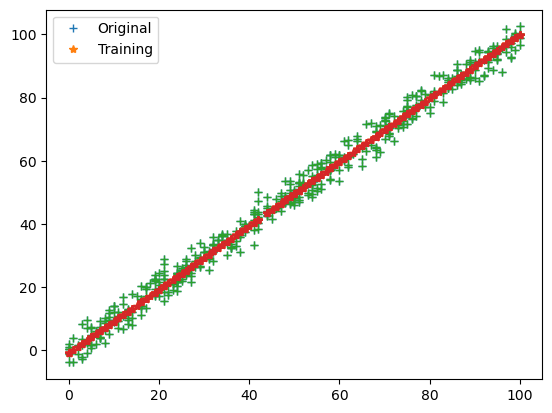

Iteration = 17, Loss = 3.986424125800631


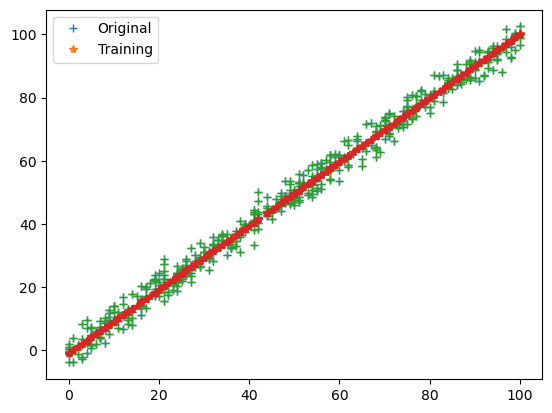

Iteration = 18, Loss = 3.9824685742428403


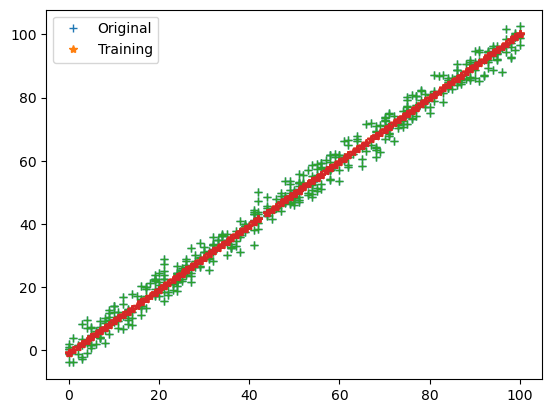

Iteration = 19, Loss = 3.980672042182345


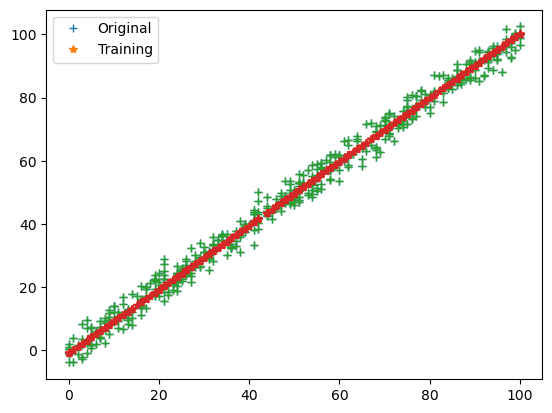

Iteration = 20, Loss = 3.979855059754596


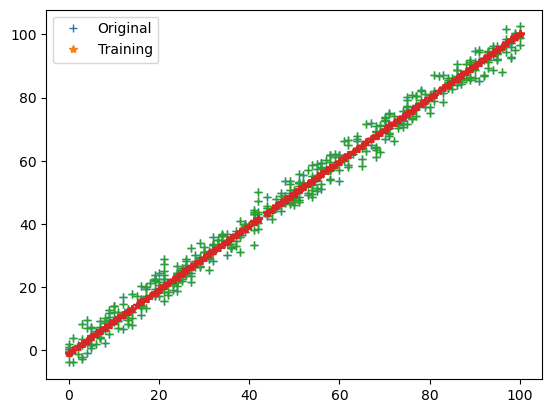

In [26]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [28]:
print(parameters)

{'m': 1.0117573450902082, 'c': -0.9751712300891553}


# Let's Predict

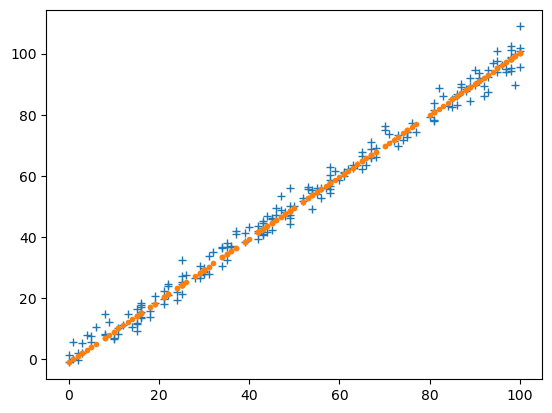

In [30]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

# Cost for test data

In [32]:
cost_function(test_predictions, test_output)

4.172205473001321